In [78]:
import cv2
import math
import time
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from IPython.display import display, HTML,clear_output
%matplotlib inline

In [79]:
def loadimage(name):
    inputImage = cv2.imread(name+'.png')
    inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
    bwimage = inputImageGray.copy()
    bwimage[bwimage < 50] = 0
    bwimage[bwimage >= 50] = 255
    return bwimage

In [80]:
def findline(bwimage):
    topmost = -1
    bottommost = -1
    for i in range(bwimage.shape[0]):
        for j in range(bwimage.shape[1]):
            if bwimage[i,j]==0 and topmost == -1:
                topmost = i
                #print(topmost)
                break
        if topmost != -1:
            break
    for i in range(bwimage.shape[0]):
        for j in range(bwimage.shape[1]):
            if bwimage[bwimage.shape[0]-1-i,j]==0 and bottommost == -1:
                bottommost = bwimage.shape[0]-1-i
                #print(bottommost)
                break
        if bottommost != -1:
            break
    return [topmost, bottommost]

In [81]:
def transform(bwimage,topmost,bottommost):
    upper = []
    bottom = []
    connected = []
    for i in range(bwimage.shape[1]):
        #top
        k = topmost
        while k < bottommost:
            if bwimage[k,i] == 0:
                break
            else:
                k += 1
        upper.append(k-topmost)
    for i in range(bwimage.shape[1]):   
        #bottom
        k = bottommost
        while k > topmost:
            if bwimage[k,i] == 0:
                break
            else:
                k -= 1
        bottom.append(bottommost-k)
    for i in range(bwimage.shape[1]):   
        #connected
        isblack = False
        cnt = 0
        for j in range(topmost,bottommost+1):
            if bwimage[j,i]==0 and isblack == False:
                cnt += 1
                isblack = True
            elif bwimage[j,i]==255 and isblack == True:
                isblack = False
        connected.append(cnt)
    return [upper,bottom,connected]

In [82]:
def addline(bwimage,topmost,bottommost):
    sample = bwimage.copy()
    for i in range(sample.shape[1]):
        for k in range(5):
            if topmost-k >= 0:
                sample[topmost-k,i] = 0
            if bottommost+k < bwimage.shape[0]:
                sample[bottommost+k,i] = 0
    return sample

In [83]:
def separate(bwimage,topmost,bottommost,upper,bottom,connected):
    index = []
    result = []
    diff = bottommost - topmost
    isWhite = False
    for i in range(len(upper)):
        if upper[i]==diff and bottom[i]==diff and connected[i]==0:
            if not isWhite:
                isWhite = True
                index.append(i)
                result
        else:
            isWhite = False
    for i in range(bwimage.shape[0]):
        for j in range(len(index)):
            bwimage[i,index[j]] = 0
            bwimage[i,index[j]+1] = 0
            bwimage[i,index[j]+2] = 0
            bwimage[i,index[j]+3] = 0
    plt.figure(figsize=(13,13))
    plt.imshow(bwimage,cmap='gray')
    plt.show()
    return index

In [84]:
def trim(topmost,bottommost,upper,bottom,connected):
    diff = bottommost-topmost
    for i in range(len(upper)):
        if upper[i] != diff or bottom[i] != diff or connected[i] != 0:
            upper = upper[i:]
            bottom = bottom[i:]
            connected = connected[i:]
            break
    for i in range(len(upper)-1):
        if upper[len(upper)-1-i] != diff or bottom[len(upper)-1-i] != diff or connected[len(upper)-1-i] != 0:
            upper = upper[:len(upper)-i]
            bottom = bottom[:len(upper)-i]
            connected = connected[:len(upper)-i]
            break
    return [upper,bottom,connected]

In [85]:
def normalized(x):
    if len(x)==1:
        return 0
    sumx = 0
    for i in range(len(x)):
        sumx += x[i]
    mean = sumx/len(x)
    std = 0
    for i in range(len(x)):
        std += (x[i]-mean)**2
    std = (std/(len(x)-1))**0.5
    for i in range(len(x)):
        x[i] = (x[i]-mean)/std
    return x

In [86]:
bwimage = loadimage('ts5')
[topmost,bottommost] = findline(bwimage)
[upper,lower,connected] = transform(bwimage,topmost,bottommost)

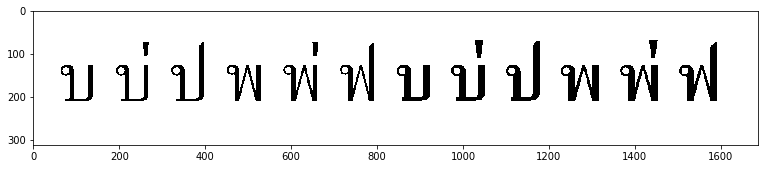

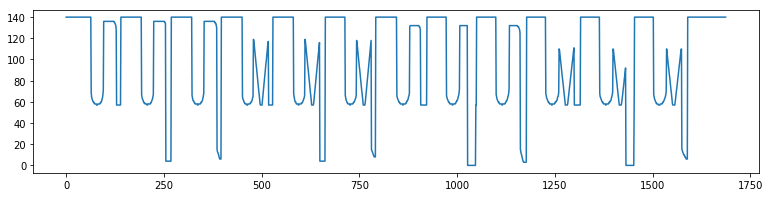

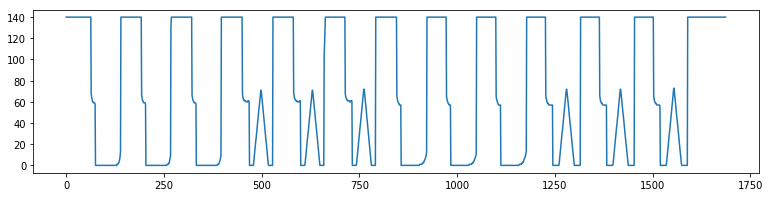

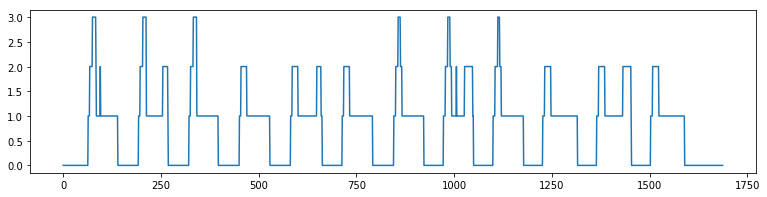

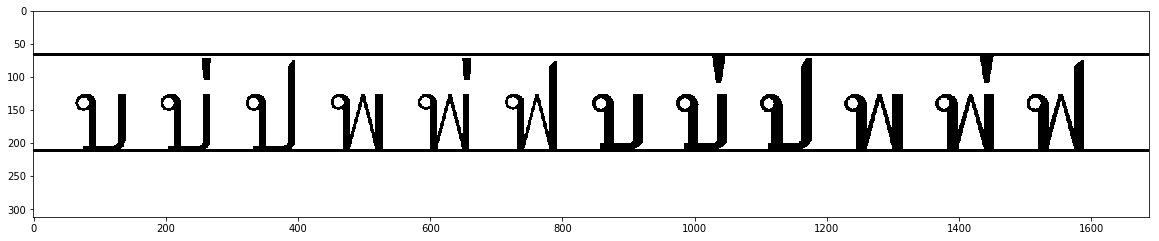

In [87]:
plt.figure(figsize=(13,13))
plt.imshow(bwimage, cmap='gray')
plt.show()
plt.figure(figsize=(13,3))
plt.plot(upper)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(lower)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(connected)
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(addline(bwimage,topmost,bottommost), cmap='gray')
plt.show()

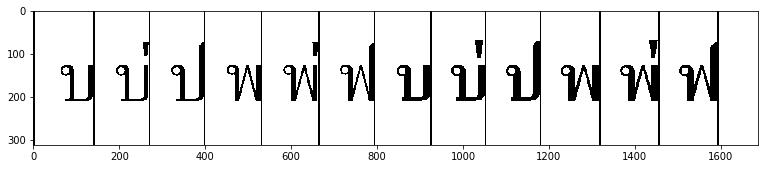

In [88]:
index = separate(bwimage,topmost,bottommost,upper,lower,connected)

In [89]:
index

[0, 140, 269, 397, 529, 663, 792, 923, 1050, 1178, 1316, 1454, 1590]

In [90]:
b = bwimage[:,index[0]+1:index[1]]
bup = upper[index[0]+1:index[1]]
blo = lower[index[0]+1:index[1]]
bcon = connected[:index[1]]

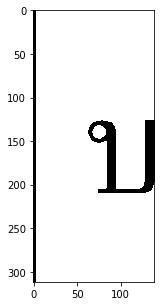

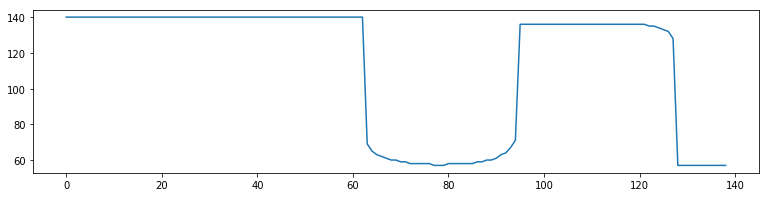

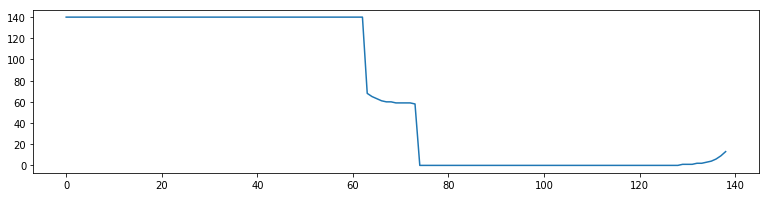

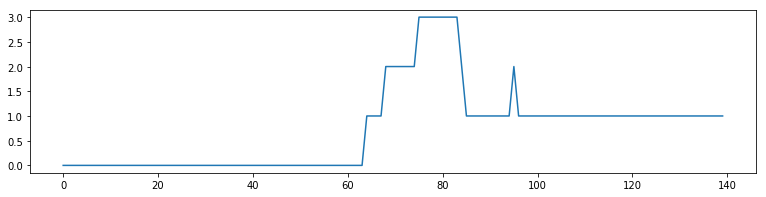

In [91]:
plt.figure(figsize=(5,5))
plt.imshow(b, cmap='gray')
plt.show()
plt.figure(figsize=(13,3))
plt.plot(bup)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(blo)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(bcon)
plt.show()

In [92]:
[bup1,blo1,bcon1] = trim(topmost,bottommost,bup,blo,bcon)

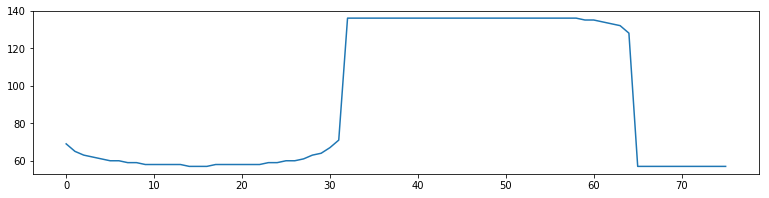

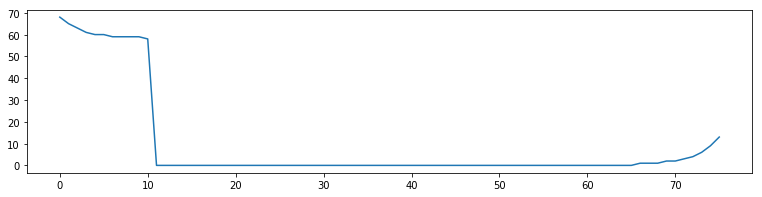

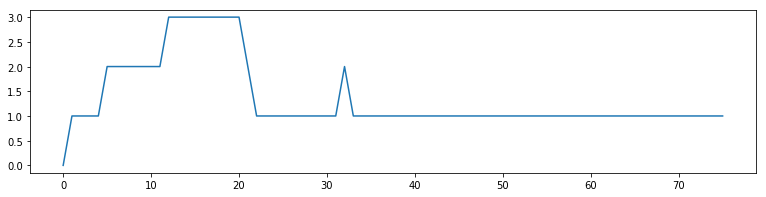

In [93]:
plt.figure(figsize=(13,3))
plt.plot(bup1)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(blo1)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(bcon1)
plt.show()

In [94]:
bup2 = normalized(bup1)
blo2 = normalized(blo1)
bcon2 = normalized(bcon1)

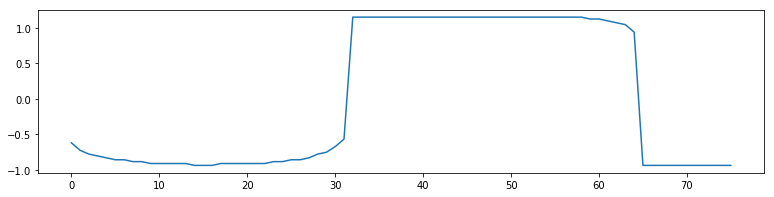

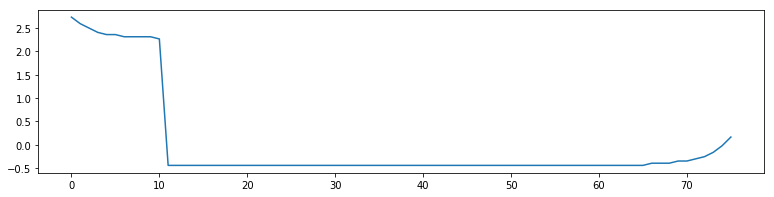

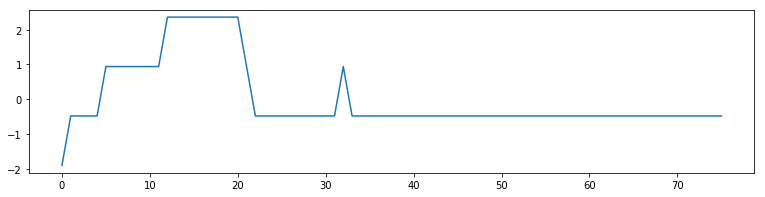

In [95]:
plt.figure(figsize=(13,3))
plt.plot(bup2)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(blo2)
plt.show()
plt.figure(figsize=(13,3))
plt.plot(bcon2)
plt.show()